In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [55]:
#for col in g_trend.columns: 
    #print(col) 

In [289]:
df = pd.read_csv("Google_Trends_combined_allyears_IH.csv")
df.head()

,Unnamed: 0,ILI_weeks,a_influenza,acute_bronchitis,body_temperature,braun_thermoscan,break_a_fever,bronchitis,chest_cold,cold_and_flu,...,what_to_do_if_you_have_the_flu,Flu_Visit_Count,ILI_Visit_Count,Unspecified,Unweighted_ILI,Label,ILI_lagwk1,ILI_lagwk2,ILI_lagwk3,ILI_lagwk4
0,0,2004_1,11,50,58,100,15,34,27,26,...,0,NaN,NaN,NaN,2.41833,2.41833,1.80906,1.71202,1.54250,1.43787
1,1,2004_2,7,41,70,54,12,31,17,20,...,0,NaN,NaN,NaN,1.80906,1.80906,1.71202,1.54250,1.43787,1.32427
2,2,2004_3,6,40,53,40,15,29,20,16,...,0,NaN,NaN,NaN,1.71202,1.71202,1.54250,1.43787,1.32427,1.30726
3,3,2004_4,4,32,57,26,18,25,21,12,...,0,NaN,NaN,NaN,1.54250,1.54250,1.43787,1.32427,1.30726,1.03698
4,4,2004_5,3,31,46,80,21,25,9,10,...,0,NaN,NaN,NaN,1.43787,1.43787,1.32427,1.30726,1.03698,1.01032


In [290]:
new_df = df.drop(['Flu_Visit_Count', 'ILI_Visit_Count', 'Unspecified'], axis=1)
new_df.head()

,Unnamed: 0,ILI_weeks,a_influenza,acute_bronchitis,body_temperature,braun_thermoscan,break_a_fever,bronchitis,chest_cold,cold_and_flu,...,type_a_influenza,upper_respiratory,walking_pneumonia,what_to_do_if_you_have_the_flu,Unweighted_ILI,Label,ILI_lagwk1,ILI_lagwk2,ILI_lagwk3,ILI_lagwk4
0,0,2004_1,11,50,58,100,15,34,27,26,...,20,37,57,0,2.41833,2.41833,1.80906,1.71202,1.54250,1.43787
1,1,2004_2,7,41,70,54,12,31,17,20,...,16,21,42,0,1.80906,1.80906,1.71202,1.54250,1.43787,1.32427
2,2,2004_3,6,40,53,40,15,29,20,16,...,16,17,38,0,1.71202,1.71202,1.54250,1.43787,1.32427,1.30726
3,3,2004_4,4,32,57,26,18,25,21,12,...,16,24,45,0,1.54250,1.54250,1.43787,1.32427,1.30726,1.03698
4,4,2004_5,3,31,46,80,21,25,9,10,...,18,25,26,0,1.43787,1.43787,1.32427,1.30726,1.03698,1.01032


In [291]:
g_trend = new_df.dropna()
g_trend.head()

,Unnamed: 0,ILI_weeks,a_influenza,acute_bronchitis,body_temperature,braun_thermoscan,break_a_fever,bronchitis,chest_cold,cold_and_flu,...,type_a_influenza,upper_respiratory,walking_pneumonia,what_to_do_if_you_have_the_flu,Unweighted_ILI,Label,ILI_lagwk1,ILI_lagwk2,ILI_lagwk3,ILI_lagwk4
0,0,2004_1,11,50,58,100,15,34,27,26,...,20,37,57,0,2.41833,2.41833,1.80906,1.71202,1.54250,1.43787
1,1,2004_2,7,41,70,54,12,31,17,20,...,16,21,42,0,1.80906,1.80906,1.71202,1.54250,1.43787,1.32427
2,2,2004_3,6,40,53,40,15,29,20,16,...,16,17,38,0,1.71202,1.71202,1.54250,1.43787,1.32427,1.30726
3,3,2004_4,4,32,57,26,18,25,21,12,...,16,24,45,0,1.54250,1.54250,1.43787,1.32427,1.30726,1.03698
4,4,2004_5,3,31,46,80,21,25,9,10,...,18,25,26,0,1.43787,1.43787,1.32427,1.30726,1.03698,1.01032


In [230]:
from sklearn.model_selection import train_test_split

#X_train, X_test, y_train = g_trend.loc[0:599, :], y_test = g_trend.loc[600:648, :]
Train=g_trend.loc[1:550, :]
X_train=Train.iloc[:,1:130]
y_train=Train.iloc[:,131]
Test=g_trend.loc[551:645,:]
X_test=Test.iloc[:,1:130]
y_test=Test.iloc[:,131]

In [231]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [232]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.9492160811703513
Testing Score: 0.9322019169324995


In [233]:
prediction = model.predict(X_test)
#print(prediction)

In [234]:
y_test_unraveled = y_test.values.ravel()
y_test.index

Int64Index([551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563,
            564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576,
            577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589,
            590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602,
            603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615,
            616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628,
            629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641,
            642, 643, 644],
           dtype='int64')

In [288]:
pred_df = pd.DataFrame({"Prediction": prediction, "Actual": y_test_unraveled}).reset_index(drop=True)
pred_df.index = y_test.index
pred_df.head()

,Prediction,Actual
501,0.946841,1.09107
502,0.929862,1.20108
503,1.465063,1.26179
504,1.580244,1.13249
505,1.650799,1.21121


In [236]:
from scipy.stats import linregress

In [237]:
x_axis = pred_df["Prediction"]
y_axis = pred_df["Actual"]

In [238]:
(slope, intercept, _, _, _) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept

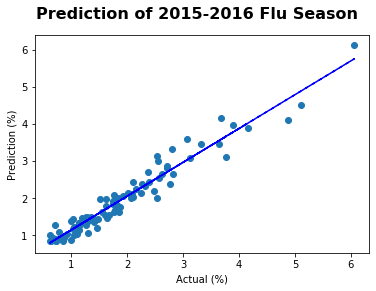

In [239]:
fig, ax = plt.subplots()

fig.suptitle("Prediction of 2015-2016 Flu Season", fontsize=16, fontweight="bold")

# ax.set_xlim(0, 10)
# ax.set_ylim(0, 10)

ax.set_xlabel("Actual (%)")
ax.set_ylabel("Prediction (%)")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')

plt.show()

In [240]:
pred_df.to_csv("Prediction_Actual.csv")

Week 1 projection

In [264]:
from sklearn.model_selection import train_test_split

#X_train, X_test, y_train = g_trend.loc[0:599, :], y_test = g_trend.loc[600:648, :]
Train=g_trend.loc[1:500, :]
X_train=Train.iloc[:,1:130]
y_train=Train.iloc[:,132]
Test=g_trend.loc[501:645,:]
X_test=Test.iloc[:,1:130]
y_test=Test.iloc[:,132]

In [265]:
print(Train.shape)
print(X_train.shape)
print(y_train.shape)
print(Test.shape)
print(X_test.shape)
print(y_test.shape)

(500, 136)
(500, 129)
(500,)
(144, 136)
(144, 129)
(144,)


In [266]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [267]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.9065421423830243
Testing Score: 0.7876305667323552


In [268]:
prediction = model.predict(X_test)
#print(prediction)

In [269]:
y_test_unraveled = y_test.values.ravel()
y_test.index

Int64Index([501, 502, 503, 504, 505, 506, 507, 508, 509, 510,
            ...
            635, 636, 637, 638, 639, 640, 641, 642, 643, 644],
           dtype='int64', length=144)

In [270]:
pred_df = pd.DataFrame({"Prediction": prediction, "Actual": y_test_unraveled}).reset_index(drop=True)
pred_df.index = y_test.index
pred_df.head()

,Prediction,Actual
501,0.945774,1.04345
502,0.883894,1.09107
503,1.264874,1.20108
504,1.238795,1.26179
505,1.453403,1.13249


In [271]:
x_axis = pred_df["Prediction"]
y_axis = pred_df["Actual"]

In [272]:
(slope, intercept, _, _, _) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept

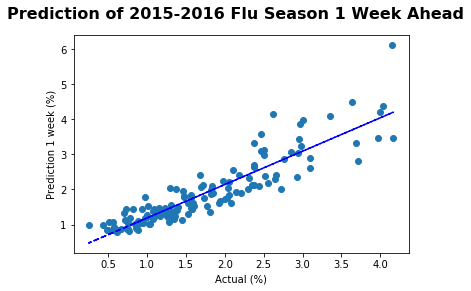

In [274]:
fig, ax = plt.subplots()

fig.suptitle("Prediction of 2015-2016 Flu Season 1 Week Ahead", fontsize=16, fontweight="bold")

# ax.set_xlim(0, 10)
# ax.set_ylim(0, 10)

ax.set_xlabel("Actual (%)")
ax.set_ylabel("Prediction 1 week (%)")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')

plt.show()

In [284]:
pred_df.to_csv("Prediction_Week1.csv")

Week 2 Projection

In [275]:
Train=g_trend.loc[1:500, :]
X_train=Train.iloc[:,1:130]
y_train=Train.iloc[:,133]
Test=g_trend.loc[501:645,:]
X_test=Test.iloc[:,1:130]
y_test=Test.iloc[:,133]

In [276]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.8552699918403783
Testing Score: 0.6335094941216866


In [277]:
prediction = model.predict(X_test)

In [278]:
y_test_unraveled = y_test.values.ravel()
y_test.index

Int64Index([501, 502, 503, 504, 505, 506, 507, 508, 509, 510,
            ...
            635, 636, 637, 638, 639, 640, 641, 642, 643, 644],
           dtype='int64', length=144)

In [279]:
pred_df = pd.DataFrame({"Prediction": prediction, "Actual": y_test_unraveled}).reset_index(drop=True)
pred_df.index = y_test.index
pred_df.head()

,Prediction,Actual
501,0.946841,1.09107
502,0.929862,1.20108
503,1.465063,1.26179
504,1.580244,1.13249
505,1.650799,1.21121


In [280]:
x_axis = pred_df["Prediction"]
y_axis = pred_df["Actual"]

In [281]:
(slope, intercept, _, _, _) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept

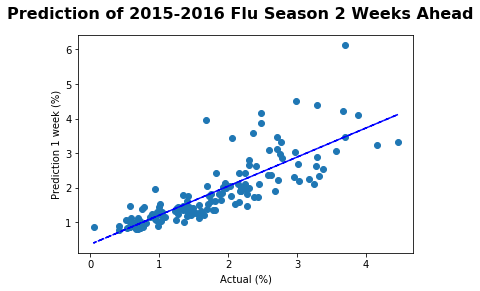

In [283]:
fig, ax = plt.subplots()

fig.suptitle("Prediction of 2015-2016 Flu Season 2 Weeks Ahead", fontsize=16, fontweight="bold")

# ax.set_xlim(0, 10)
# ax.set_ylim(0, 10)

ax.set_xlabel("Actual (%)")
ax.set_ylabel("Prediction 1 week (%)")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')

plt.show()

In [285]:
pred_df.to_csv("Prediction_Week2.csv")

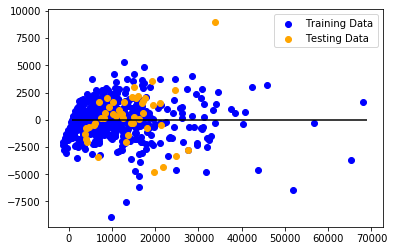

In [119]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
#plt.title("Residual Plot")